# ***What is R?***
---
*  ### Open-source programming language and software environment
*  ### Focuses on statistical computing and graphics
*  ### Large and active user community with extensive libraries
*  ### Free to use and readily available on various platforms

# ***Why R for Web Scraping?***
---
*  ### Rich ecosystem of web scraping libraries: _`rvest`_, _`RSelenium`_
*  ### Data manipulation and analysis strength of R
*  ### Integration with popular data visualization libraries like _`ggplot2`_
*  ### Open-source and free to use

# ***R Capabilities for Web Scraping***
---
* ### R goes beyond just harvesting data
* ### Key functionalities for web scraping tasks:
	- ### Sending HTTP requests to websites (obtaining the content)
	- ### Parsing HTML structure (understanding the website's layout)
	- ### Extracting specific data using selectors (targeting desired information)
	- ### Cleaning and transforming extracted data (preparing for analysis)
    - ### Navigating dynamic website using _`RSelenium`_ package

# ***Direct data import from the web***
---


In [1]:
df <- read.csv("http://s.anilz.net/wb_energy")
head(df)

dx <- read.csv("https://data.ny.gov/api/views/d6yy-54nr/rows.csv")
head(dx)

,year,country,ccode,ele_rural,ele_total,ele_urban,en_int,ren_ele,ren_con,tot_ele,tfec
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1990,Afghanistan,AFG,NA,0.01000,52.03698,1.884113,764,6312.3920,1128,39639.420
2,1990,Albania,ALB,100.000000,100.00000,100.00000,7.912243,2848,20429.1800,3296,80057.645
3,1990,Algeria,DZA,96.392315,98.27138,100.00000,3.500935,135,811.7773,16104,458040.442
4,1990,American Samoa,ASM,NA,NA,NA,NA,0,0.0000,100,306.000
5,1990,Andorra,AND,100.000000,100.00000,100.00000,NA,120,952.1450,120,6670.695
6,1990,Angola,AGO,7.518615,11.39781,22.68237,4.605300,725,135443.7000,841,187451.703


,Draw.Date,Winning.Numbers,Multiplier
,<chr>,<chr>,<int>
1,09/26/2020,11 21 27 36 62 24,3
2,09/30/2020,14 18 36 49 67 18,2
3,10/03/2020,18 31 36 43 47 20,2
4,10/07/2020,06 24 30 53 56 19,2
5,10/10/2020,05 18 23 40 50 18,3
6,10/14/2020,21 37 52 53 58 05,2


# ***Using rvest package for static website scraping***
---


---
### Example 1. share price scraping
---

In [ ]:
#loading necessary packages
library(rvest) #see https://rvest.tidyverse.org/articles/harvesting-the-web.html for details
library(dplyr)

#loading webpage content
webpage <- read_html("https://www.sharesansar.com/today-share-price")

#extracting table from the webpage
tables <- html_table(webpage)

#checking the number of tables available in the webpage
length(tables)

In [3]:
#storing the table in a dataframe
df1 <- tables[[1]]
head(df1)

S.No,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,⋯,Trans.,Diff,Range,Diff %,Range %,VWAP %,120 Days,180 Days,52 Weeks High,52 Weeks Low
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,ACLBSL,39.42,983.10,998.00,970.00,986.00,979.31,"5,844.00","1,000.00",⋯,97,-14.0,28.00,-1.40,2.89,0.68,723.12,661.36,"1,043.00",500.10
2,ADBL,49.67,267.90,267.90,261.50,261.50,263.74,"19,809.00",268.00,⋯,152,-6.5,6.40,-2.43,2.45,-0.86,242.33,245.32,292.90,223.00
3,ADBLD83,61.57,"1,061.00","1,101.50","1,061.00","1,101.50","1,070.29",350.00,"1,080.00",⋯,8,21.5,40.50,1.99,3.82,2.83,"1,027.30","1,001.25","1,144.00",941.00
4,AHL,43.71,505.00,508.90,492.00,500.00,499.00,"16,996.00",497.00,⋯,139,3.0,16.90,0.60,3.43,0.20,438.14,401.68,547.00,273.10
5,AHPC,44.72,161.00,161.00,156.00,156.00,157.69,"118,322.00",157.90,⋯,375,-1.9,5.00,-1.20,3.21,-1.09,194.98,200.45,316.00,150.00
6,AKJCL,53.18,216.00,220.10,213.60,213.60,216.51,"42,372.00",216.90,⋯,188,-3.3,6.50,-1.52,3.04,-1.36,214.70,194.40,250.00,141.30


In [4]:
#filtering upper and lower circuit stock
#See https://github.com/tempgita/training/blob/master/archieved/R%20Training%20(old)/Day%203-Session%203/dplyr%20-%20A%20Grammar%20of%20Data%20Manipulation.pdf for data manipulation using dplyr package
filtered_df1 <- df1 %>% filter(`Diff %` > 9 | `Diff %`< -9) %>% arrange(`Diff %`)
filtered_df1

S.No,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,⋯,Trans.,Diff,Range,Diff %,Range %,VWAP %,120 Days,180 Days,52 Weeks High,52 Weeks Low
<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
102,KBSH,51.72,"1,695.40","1,695.40","1,557.00","1,557.00","1,562.78","12,879.00","1,730.00",⋯,203,-173,138.40,-10,8.89,-0.37,"1,015.12",940.07,"1,730.00",479.00
140,MKLB,51.89,"1,836.00","1,836.00","1,620.00","1,620.00","1,627.02","1,405.00","1,800.00",⋯,36,-180,216.00,-10,13.33,-0.43,868.11,779.80,"1,836.00",526.20
242,SAMAJ,65.63,"2,151.00","2,409.00","2,151.00","2,409.00","2,301.38","10,537.00","2,190.00",⋯,160,219,258.00,10,11.99,4.47,"1,434.82",0.00,"2,488.20",64.80


In [5]:
write.csv(filtered_df1, file = "example1.csv", row.names = FALSE)

---
### Example 2. Forex from NRB
---

In [6]:
#loading webpage content
webpage <- read_html("https://www.nrb.org.np")

#extracting table from the webpage
tables <- html_table(webpage)

#checking the number of tables available in the webpage
length(tables)

[1] 2

In [7]:
df1 <- tables[[1]]
df2 <- tables[[2]]

df1
df2

Currency,Buy,Sell
<chr>,<dbl>,<dbl>
USD,133.40,134.00
EUR,142.95,143.59
GBP,169.03,169.79
AUD,88.08,88.47
SGD,98.61,99.06
JPY,8.46,8.50


Last Updated,13/06/2024,12/06/2024
<chr>,<chr>,<chr>
Total Deposits ( in NPR Billion),"6,242","6,235"
Commercial Banks Total Deposits ( in NPR Billion),"5,525","5,519"
Other BFIs Total Deposits ( in NPR Billion),717,716
Total Lending ( in NPR Billion),"5,133","5,131"
Commercial Banks Total Lending ( in NPR Billion),"4,542","4,541"
Other BFIs Total Lending ( in NPR Billion),591,591
CD Ratio ( in %),80.08,80.14
Interbank Interest Rate LCY - Weighted Avg. ( in %),2.95,2.97


In [8]:
#keeping USD and JPY only
filtered_df1 <- df1 %>% filter(Currency=='USD' | Currency =='JPY')
filtered_df1

write.csv(filtered_df1, file = "example2.csv", row.names = FALSE)

Currency,Buy,Sell
<chr>,<dbl>,<dbl>
USD,133.40,134.0
JPY,8.46,8.5


---
### Practice 1. Web-scrape the Historical ranking table from https://en.wikipedia.org/wiki/ICC_Men%27s_T20I_Team_Rankings and save it as practice1.csv
---
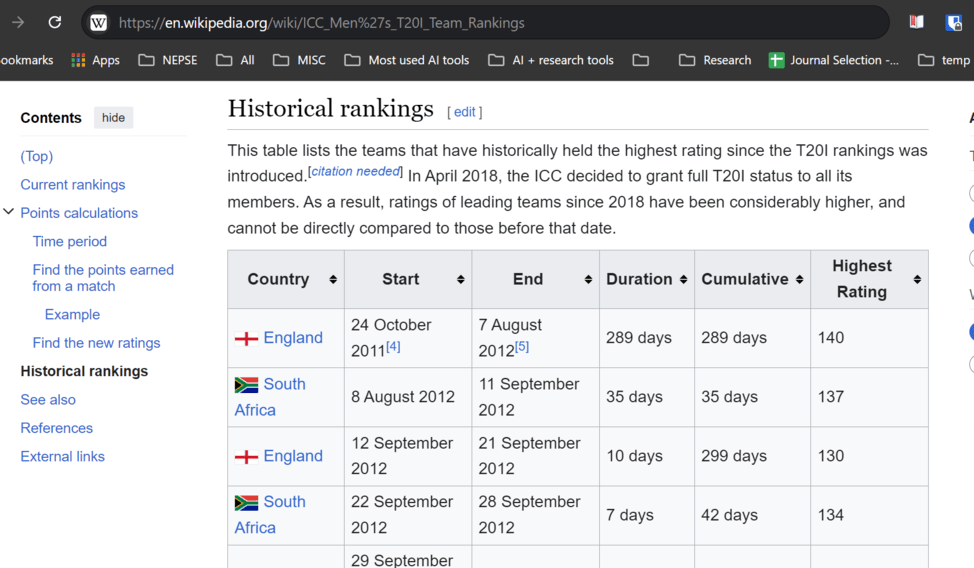